# Training Models Using Feature Set 2
Feature set 2 - ['Soil Moisture', 'Temperature', 'Soil Humidity', 'Air temperature (C)', 'Wind speed (Km/h)', 'Pressure (KPa)'] 

## Data Preprocessing

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('soil_data.csv')
df.head()

,Soil Moisture,Temperature,Soil Humidity,Time,Air temperature (C),Wind speed (Km/h),Air humidity (%),Wind gust (Km/h),Pressure (KPa),ph,rainfall,N,P,K,Status
0,54,22,70,21,19.52,2.13,55.04,6.30,101.50,6.502985,202.935536,90.0,42.0,43.0,ON
1,12,20,40,104,19.49,2.01,55.17,10.46,101.50,7.038096,226.655537,85.0,58.0,41.0,OFF
2,34,26,35,62,19.47,1.90,55.30,14.63,101.51,7.840207,263.964248,60.0,55.0,44.0,ON
3,7,44,44,93,19.54,2.28,54.20,16.08,101.51,6.980401,242.864034,74.0,35.0,40.0,OFF
4,50,38,23,92,19.61,2.66,53.09,17.52,101.51,7.628473,262.717340,78.0,42.0,42.0,OFF


In [28]:
df.columns

Index(['Soil Moisture', 'Temperature', 'Soil Humidity', 'Time',
       'Air temperature (C)', 'Wind speed (Km/h)', 'Air humidity (%)',
       'Wind gust (Km/h)', 'Pressure (KPa)', 'ph', 'rainfall', 'N', 'P', 'K',
       'Status'],
      dtype='object')

In [30]:
#various feature sets were determined in the process of feature engineering
selectkbest_feature_cols = ['Soil Moisture', 'Temperature', 'Soil Humidity', 'Air humidity (%)']

vif_feature_cols = ['Soil Moisture', 'Temperature', 'Soil Humidity', 'Air humidity (%)', 'Wind gust (Km/h)']

linear_regression_feature_cols = ['Soil Moisture', 'Temperature', 'Soil Humidity', 'Air temperature (C)', 'Wind speed (Km/h)', 'Pressure (KPa)'] 

In [32]:
df = df.dropna(axis=0, subset=['Air temperature (C)'])\
    .drop(['N','P','K','rainfall','ph'], axis = 1) #dropped all columns with fewer than a 23995 records

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23995 entries, 0 to 26300
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Soil Moisture        23995 non-null  int64  
 1   Temperature          23995 non-null  int64  
 2   Soil Humidity        23995 non-null  int64  
 3   Time                 23995 non-null  int64  
 4   Air temperature (C)  23995 non-null  float64
 5   Wind speed (Km/h)    23995 non-null  float64
 6   Air humidity (%)     23995 non-null  float64
 7   Wind gust (Km/h)     23995 non-null  float64
 8   Pressure (KPa)       23995 non-null  float64
 9   Status               23995 non-null  object 
dtypes: float64(5), int64(4), object(1)
memory usage: 2.0+ MB


In [36]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [38]:
feature_cols = linear_regression_feature_cols
X = df[feature_cols]
y = df.Status.map({'OFF': 0, 'ON': 1})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Logistic Regression
pros
- Doesn't require high computation

cons
- Vulnerable to overfitting 

#### Training Model

In [41]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=16)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

#### Training Set Evaluations

In [107]:
def perf_metrics(model_type, ac, pr, re, f1):
    print(f"{model_type} Performance Metrics:")
    print(f"Accuracy : {ac:.4f}")
    print(f"Precision: {pr:.4f}")
    print(f"Recall   : {re:.4f}")
    print(f"F1-Score : {f1:.4f}")

In [117]:
y_train_pred_logreg = logreg.predict(X_train)

train_accuracy_logreg = metrics.accuracy_score(y_train, y_train_pred_logreg)
train_precision_logreg = metrics.precision_score(y_train, y_train_pred_logreg)
train_recall_logreg = metrics.recall_score(y_train, y_train_pred_logreg)
train_f1_logreg = metrics.f1_score(y_train, y_train_pred_logreg)

perf_metrics("Logistic Regression", train_accuracy_logreg, train_precision_logreg, train_recall_logreg, train_f1_logreg)

Logistic Regression Performance Metrics:
Accuracy : 0.7018
Precision: 0.7124
Recall   : 0.7507
F1-Score : 0.7311


#### Test Set Evaluations

In [109]:
y_pred_logreg = logreg.predict(X_test)

accuracy_logreg = metrics.accuracy_score(y_test, y_pred_logreg)
precision_logreg = metrics.precision_score(y_test, y_pred_logreg)
recall_logreg = metrics.recall_score(y_test, y_pred_logreg)
f1_logreg = metrics.f1_score(y_test, y_pred_logreg)

perf_metrics("Logistic Regression", accuracy_logreg, precision_logreg, recall_logreg, f1_logreg)

Logistic Regression Performance Metrics:
Accuracy : 0.7016
Precision: 0.7104
Recall   : 0.7599
F1-Score : 0.7343


#### Classification Report

In [92]:
target_names = ['OFF', 'ON']
print(metrics.classification_report(y_test, y_pred_logreg, target_names=target_names))

              precision    recall  f1-score   support

         OFF       0.69      0.63      0.66      3293
          ON       0.71      0.76      0.73      3906

    accuracy                           0.70      7199
   macro avg       0.70      0.70      0.70      7199
weighted avg       0.70      0.70      0.70      7199



#### Confusion Matrix

Text(0.5, 23.52222222222222, 'Predicted label')

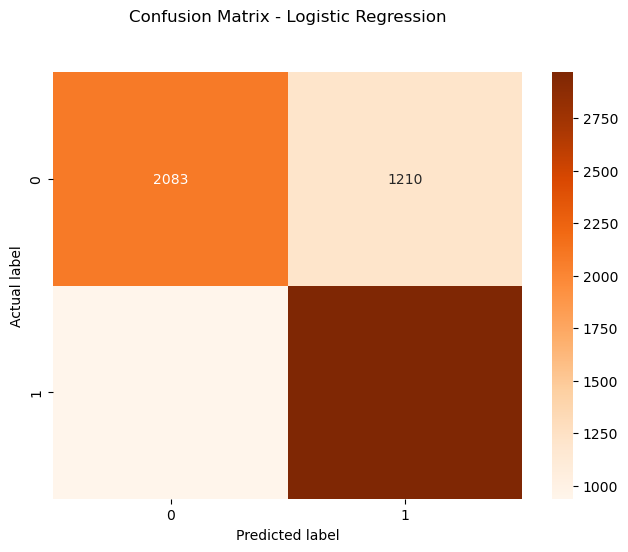

In [129]:
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Oranges" ,fmt='g')
plt.tight_layout()
plt.title('Confusion Matrix - Logistic Regression', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#### ROC Curve

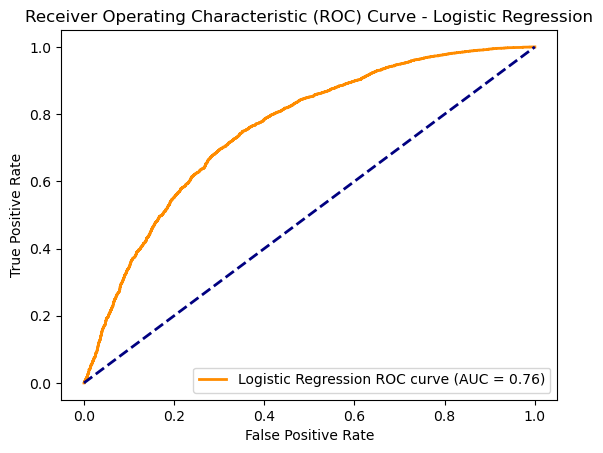

In [103]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr_logreg, tpr_logreg, thresholds_logreg = metrics.roc_curve(y_test, y_pred_proba)
roc_auc_logreg = metrics.auc(fpr_logreg, tpr_logreg)

plt.plot(fpr_logreg, tpr_logreg, color='darkorange', lw=2, label=f'Logistic Regression ROC curve (AUC = {roc_auc_logreg:.2f})')
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()


### Decision Trees
pros
- Easy to interpret and visualize
- Easily captures non-linear patterns
- No assumptions about distribution (non-parametric nature)

cons
- Sensitive to noisy data and can overfit
- Biaseed with imbalanced datasets

In [331]:
from sklearn.tree import DecisionTreeClassifier

In [332]:
clf = DecisionTreeClassifier()

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.6535629948603973


In [333]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [334]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [335]:
# from sklearn.tree import export_graphviz
# from six import StringIO 
# from IPython.display import Image  
# import pydotplus

# dot_data = StringIO()
# export_graphviz(clf, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True,feature_names = feature_cols,class_names=['0','1'])
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# graph.write_png('tree.png')
# Image(graph.create_png())


In [336]:
# Can do pre-pruning by specifying max depth and also choose other attribute selections
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7103764411723851


### Naive Bayes

In [166]:
from sklearn.naive_bayes import GaussianNB

#### Training Model

In [169]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

#### Training Set Evaluations

In [221]:
y_train_pred_nb = nb.predict(X_train)

train_accuracy_nb = metrics.accuracy_score(y_train, y_train_pred_nb)
train_precision_nb = metrics.precision_score(y_train, y_train_pred_nb)
train_recall_nb = metrics.recall_score(y_train, y_train_pred_nb)
train_f1_nb = metrics.f1_score(y_train, y_train_pred_nb)

perf_metrics("Naive Bayes", train_accuracy_nb, train_precision_nb, train_recall_nb, train_f1_nb)

Naive Bayes Performance Metrics:
Accuracy : 0.7018
Precision: 0.7123
Recall   : 0.7507
F1-Score : 0.7310


#### Test Set Evaluations

In [224]:
y_pred_nb = nb.predict(X_test)

accuracy_nb = metrics.accuracy_score(y_test, y_pred_nb)
precision_nb = metrics.precision_score(y_test, y_pred_nb)
recall_nb = metrics.recall_score(y_test, y_pred_nb)
f1_nb = metrics.f1_score(y_test, y_pred_nb)

perf_metrics("Naive Bayes", accuracy_nb, precision_nb, recall_nb, f1_nb)

Naive Bayes Performance Metrics:
Accuracy : 0.7030
Precision: 0.7118
Recall   : 0.7606
F1-Score : 0.7354


#### Classification Report

In [178]:
#note - identical to logistic regression??
target_names = ['OFF', 'ON']
print(metrics.classification_report(y_test, y_pred_nb, target_names=target_names))

              precision    recall  f1-score   support

         OFF       0.69      0.63      0.66      3293
          ON       0.71      0.76      0.74      3906

    accuracy                           0.70      7199
   macro avg       0.70      0.70      0.70      7199
weighted avg       0.70      0.70      0.70      7199



Text(0.5, 23.52222222222222, 'Predicted label')

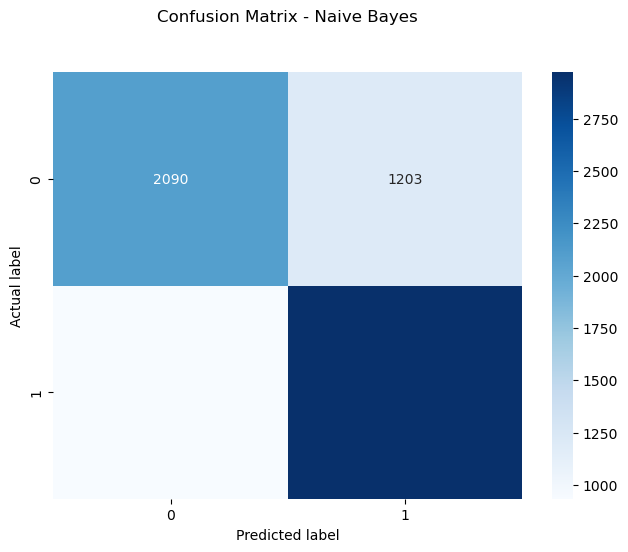

In [180]:
cnf_matrix = confusion_matrix(y_test, y_pred)
class_names=["OFF","ON"] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g')
plt.tight_layout()
plt.title('Confusion Matrix - Naive Bayes', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#### ROC Curve

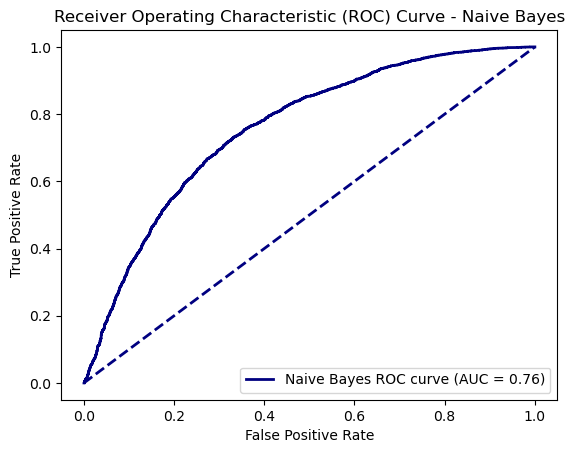

In [226]:
y_pred_proba = nb.predict_proba(X_test)[::,1]
fpr_nb, tpr_nb, thresholds_nb = metrics.roc_curve(y_test, y_pred_proba)
roc_auc_nb = metrics.auc(fpr_nb, tpr_nb)

plt.plot(fpr_nb, tpr_nb, color='navy', lw=2, label=f'Naive Bayes ROC curve (AUC = {roc_auc_nb:.2f})')
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Naive Bayes')
plt.legend(loc="lower right")
plt.show()


### Random Forest

In [188]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

import graphviz

#### Training Model

In [191]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

#### Training Set Evaluation

In [196]:
y_train_pred_rf = rf.predict(X_train)

train_accuracy_rf = metrics.accuracy_score(y_train, y_train_pred_rf)
train_precision_rf = metrics.precision_score(y_train, y_train_pred_rf)
train_recall_rf = metrics.recall_score(y_train, y_train_pred_rf)
train_f1_rf = metrics.f1_score(y_train, y_train_pred_rf)

perf_metrics("Random Forest", train_accuracy_rf, train_precision_rf, train_recall_rf, train_f1_rf)

Logistic Regression Performance Metrics:
Accuracy : 1.0000
Precision: 1.0000
Recall   : 1.0000
F1-Score : 1.0000


#### Test Set Evaluation

In [206]:
y_pred_rf = rf.predict(X_test)

accuracy_rf = metrics.accuracy_score(y_test, y_pred_rf)
precision_rf = metrics.precision_score(y_test, y_pred_rf)
recall_rf = metrics.recall_score(y_test, y_pred_rf)
f1_rf = metrics.f1_score(y_test, y_pred_rf)

perf_metrics("Random Forest", accuracy_rf, precision_rf, recall_rf, f1_rf)

Random Forest Performance Metrics:
Accuracy : 0.7262
Precision: 0.7246
Recall   : 0.7990
F1-Score : 0.7600


#### Classification Report

In [209]:
target_names = ['OFF', 'ON']
print(metrics.classification_report(y_test, y_pred_logreg, target_names=target_names))

              precision    recall  f1-score   support

         OFF       0.69      0.63      0.66      3293
          ON       0.71      0.76      0.73      3906

    accuracy                           0.70      7199
   macro avg       0.70      0.70      0.70      7199
weighted avg       0.70      0.70      0.70      7199



#### Confusion Matrix

Text(0.5, 23.52222222222222, 'Predicted label')

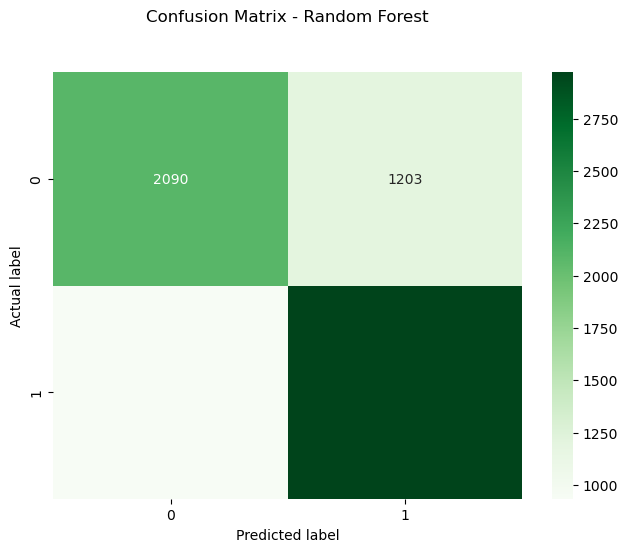

In [216]:
class_names=["OFF","ON"] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Greens" ,fmt='g')
plt.tight_layout()
plt.title('Confusion Matrix - Random Forest', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#### ROC Curve

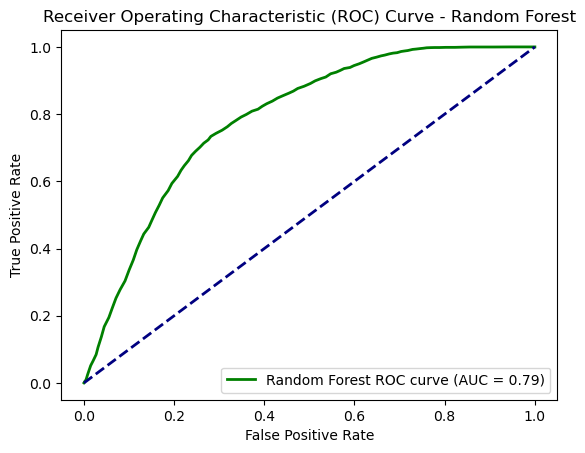

In [219]:
y_pred_proba = rf.predict_proba(X_test)[::,1]
fpr_rf, tpr_rf, thresholds_rf = metrics.roc_curve(y_test, y_pred_proba)
roc_auc_rf = metrics.auc(fpr_rf, tpr_rf)

plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest ROC curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()


In [ ]:
#stopping overfitting

In [308]:
rf = RandomForestClassifier(
    max_depth = 10, 
    n_estimators = 156,
    random_state=42
)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=156, random_state=42)

In [309]:
y_train_pred_rf = rf.predict(X_train)

train_accuracy_rf = metrics.accuracy_score(y_train, y_train_pred_rf)
train_precision_rf = metrics.precision_score(y_train, y_train_pred_rf)
train_recall_rf = metrics.recall_score(y_train, y_train_pred_rf)
train_f1_rf = metrics.f1_score(y_train, y_train_pred_rf)

perf_metrics("Random Forest", train_accuracy_rf, train_precision_rf, train_recall_rf, train_f1_rf)

Random Forest Performance Metrics:
Accuracy : 0.8042
Precision: 0.7982
Recall   : 0.8530
F1-Score : 0.8247


In [312]:
y_pred_rf = rf.predict(X_test)

accuracy_rf = metrics.accuracy_score(y_test, y_pred_rf)
precision_rf = metrics.precision_score(y_test, y_pred_rf)
recall_rf = metrics.recall_score(y_test, y_pred_rf)
f1_rf = metrics.f1_score(y_test, y_pred_rf)

perf_metrics("Random Forest", accuracy_rf, precision_rf, recall_rf, f1_rf)

Random Forest Performance Metrics:
Accuracy : 0.7311
Precision: 0.7334
Recall   : 0.7924
F1-Score : 0.7618


In [ ]:
# Random Forest Performance Metrics (without tuning):
# Accuracy : 0.7262
# Precision: 0.7246
# Recall   : 0.7990
# F1-Score : 0.7600

## ignore

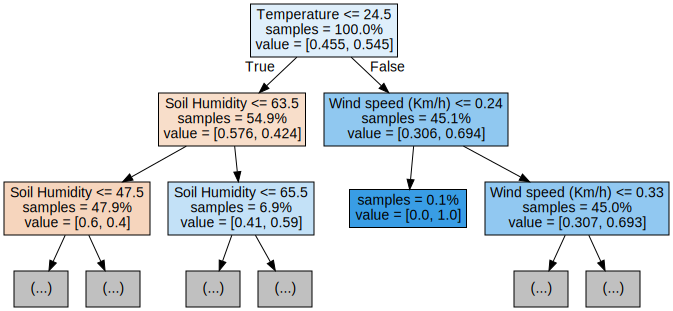

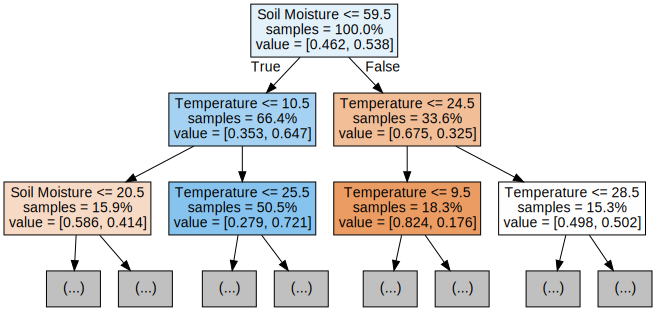

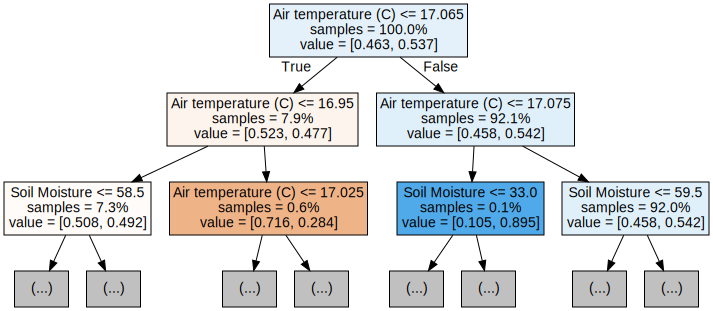

In [345]:
for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [346]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

rf = RandomForestClassifier()
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001CE11661750>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001CE2D415B90>})

In [347]:
best_rf = rand_search.best_estimator_
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 8, 'n_estimators': 156}


In [350]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.7389915266009168
Precision: 0.74735025881193
Recall: 0.7802367472979927


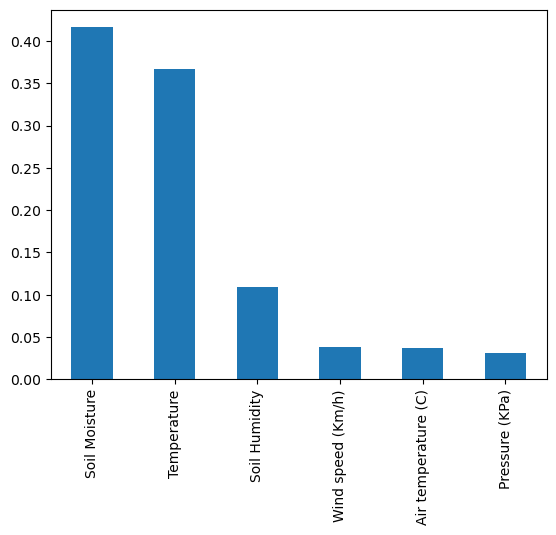

In [352]:
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_importances.plot.bar();

In [356]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Initialize and train Random Forest model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5)
grid_rf.fit(X_train, y_train)
print("Best Parameters for Random Forest:", grid_rf.best_params_)

# Predict and evaluate
y_pred_rf = rf_clf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
print(classification_report(y_test, y_pred_rf))

Best Parameters for Random Forest: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest Accuracy: 0.740102792054452
              precision    recall  f1-score   support

           0       0.74      0.67      0.70      3313
           1       0.74      0.80      0.77      3886

    accuracy                           0.74      7199
   macro avg       0.74      0.73      0.74      7199
weighted avg       0.74      0.74      0.74      7199

